In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# Load the processed metadataset
metadataset = pd.read_csv('../data/processed/metadata.csv', index_col=0)
metadataset

,cloud,land,missing_landsat,kelp,in_train
tile_id,,,,,
JW725114,0.008294,0.142604,0.000000,0.000082,True
UX493605,0.004155,0.303135,0.000000,0.007404,True
OU500661,0.039673,0.254376,0.000000,0.000000,True
DC227980,0.009371,0.429110,0.000000,0.000000,True
SS602790,0.061763,0.837020,0.000000,0.000000,True
...,...,...,...,...,...
UT495238,0.297796,0.601306,0.296580,NaN,False
GE987629,0.307053,0.125967,0.307020,NaN,False
EN974536,0.348498,0.714710,0.348269,NaN,False


TODO: Load prediction results csv to analyze performance

In [50]:
# Load the prediction results
path = '../data/processed/results.csv'
results = pd.read_csv(path, index_col=0)
results

,pred_sum,target_sum,intersection,dice_coef
image_key,,,,
AA800151,2820.854492,198,197.212738,0.130654
AD819150,2243.988281,1758,1262.307251,0.630840
AF191061,1923.189819,1632,1252.291382,0.704486
AG525529,17.103409,0,0.000000,0.000000
AG705659,2181.978760,1149,965.362244,0.579627
...,...,...,...,...
ZY643171,21.695826,0,0.000000,0.000000
ZY775733,21.746630,0,0.000000,0.000000
ZZ305703,118.021545,1056,96.676666,0.164693


Join the results with the metadata

In [51]:
results = results.join(metadataset)
results

,pred_sum,target_sum,intersection,dice_coef,cloud,land,missing_landsat,kelp,in_train
image_key,,,,,,,,,
AA800151,2820.854492,198,197.212738,0.130654,0.001616,0.103331,0.000000,0.001616,True
AD819150,2243.988281,1758,1262.307251,0.630840,0.198645,0.688653,0.196931,0.014351,True
AF191061,1923.189819,1632,1252.291382,0.704486,0.010245,0.366939,0.000000,0.013322,True
AG525529,17.103409,0,0.000000,0.000000,0.083869,0.000000,0.000000,0.000000,True
AG705659,2181.978760,1149,965.362244,0.579627,0.015543,0.606122,0.000000,0.009380,True
...,...,...,...,...,...,...,...,...,...
ZY643171,21.695826,0,0.000000,0.000000,0.000065,0.099396,0.000000,0.000000,True
ZY775733,21.746630,0,0.000000,0.000000,0.000082,0.544612,0.000000,0.000000,True
ZZ305703,118.021545,1056,96.676666,0.164693,0.108588,0.606016,0.000000,0.008620,True


In [52]:
# compute error (difference between dice if prediction would've been perfect and actual dice)
total_intersection = results['intersection'].sum()
total_pred_target_sum = results['pred_sum'].sum() + results['target_sum'].sum()

perfect_dice_coef = (2*results['intersection']+total_intersection) / (2*results['intersection'] + total_pred_target_sum)
actual_dice_coef = (2*results['intersection']+total_intersection) / (results['pred_sum'] + results['target_sum'] + total_pred_target_sum)
results['error'] = perfect_dice_coef - actual_dice_coef
results

,pred_sum,target_sum,intersection,dice_coef,cloud,land,missing_landsat,kelp,in_train,error
image_key,,,,,,,,,,
AA800151,2820.854492,198,197.212738,0.130654,0.001616,0.103331,0.000000,0.001616,True,0.000429
AD819150,2243.988281,1758,1262.307251,0.630840,0.198645,0.688653,0.196931,0.014351,True,0.000242
AF191061,1923.189819,1632,1252.291382,0.704486,0.010245,0.366939,0.000000,0.013322,True,0.000172
AG525529,17.103409,0,0.000000,0.000000,0.083869,0.000000,0.000000,0.000000,True,0.000003
AG705659,2181.978760,1149,965.362244,0.579627,0.015543,0.606122,0.000000,0.009380,True,0.000229
...,...,...,...,...,...,...,...,...,...,...
ZY643171,21.695826,0,0.000000,0.000000,0.000065,0.099396,0.000000,0.000000,True,0.000004
ZY775733,21.746630,0,0.000000,0.000000,0.000082,0.544612,0.000000,0.000000,True,0.000004
ZZ305703,118.021545,1056,96.676666,0.164693,0.108588,0.606016,0.000000,0.008620,True,0.000161


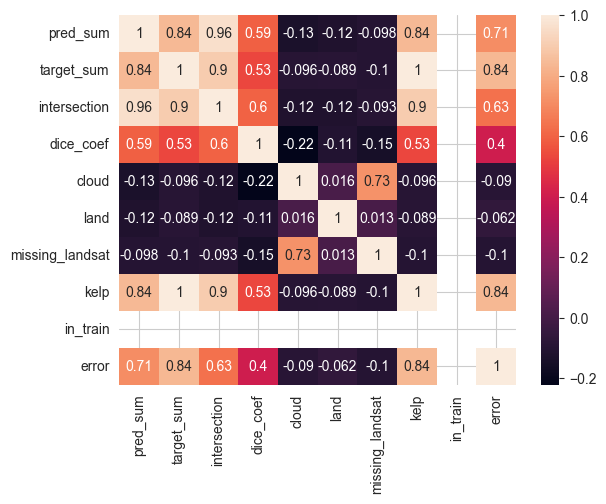

In [53]:
# Plot the correlation matrix with sns
corr = results.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [56]:
# Plot scatterplots of dice coefficient, against kelp, land, cloud and missing_landsat, with plotly
import plotly.express as px
for col in ['dice_coef','kelp', 'land', 'cloud', 'missing_landsat']:
    fig = px.scatter(results, x=col, y='error')
    fig.show()

In [57]:
for col in ['error','kelp', 'land', 'cloud', 'missing_landsat']:
    fig = px.scatter(results, x=col, y='dice_coef')
    fig.show()